# Carga de datos

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# cargar dataser
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
print(df.head(5))
# Convertir en array
data = df.values

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [2]:
data.shape

(506, 14)

In [3]:
#Separar en X y y
X, y = data[:, :-1], data[:, -1]
# separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [4]:
# ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)
# obtener predicciones
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


# Isolation Forest

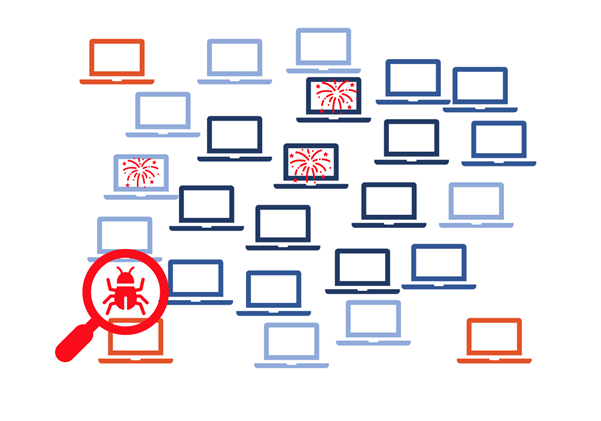

In [12]:
from sklearn.ensemble import IsolationForest
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
len(yhat[yhat==-1])

34

In [16]:
df.iloc[:,0:-1].values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
iso2 = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat2 = iso2.fit_predict(df.iloc[:,0:-1].values)
df2= df.copy()
df2['outlier']=yhat2
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,outlier
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,1


In [20]:
df2.groupby('outlier').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
outlier,,,,,,,,,,,,,,
-1,10.566678,16.950980,14.737843,0.274510,0.639941,6.287392,77.976471,3.002298,11.196078,481.705882,17.529412,285.001176,15.733922,24.005882
1,2.834159,10.737363,10.733143,0.046154,0.545140,6.284325,67.521099,3.883900,9.364835,400.002198,18.559341,364.707692,12.307736,22.367692


In [8]:
len(yhat)

339

In [9]:
from sklearn.ensemble import IsolationForest
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro
X_train_i, y_train_i = X_train[mask, :], y_train[mask]
# Ajustar modelo
model = LinearRegression()
model.fit(X_train_i, y_train_i)
# evaluar el modelo
yhat_i = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat_i)
print('MAE: %.3f' % mae)

MAE: 3.196


# Minimum Covariance Determinant

In [14]:
from sklearn.covariance import EllipticEnvelope
# identicar outliers con el metodo
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(X_train)
# Seleccionar filas que no son outliers
mask = yhat != -1
X_train_m, y_train_m = X_train[mask, :], y_train[mask]
# Dataset reusltante luego de limpiar
print(X_train.shape, y_train.shape)
# Ajustar el modelo
model = LinearRegression()
model.fit(X_train_m, y_train_m)
# Obtener predicciones
yhat_m = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat_m)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.539


# Local Outlier Factor

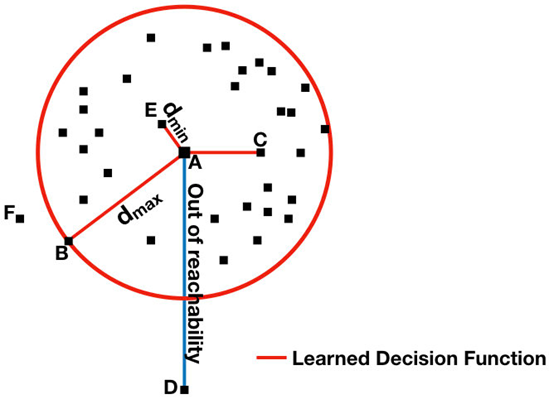

In [15]:
from sklearn.neighbors import LocalOutlierFactor
#LocalOutlierFactor?

In [21]:
from sklearn.neighbors import LocalOutlierFactor
# identicar outliers en train
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski')
yhat = lof.fit_predict(X_train)
# seleccionar filas que no son outliers
mask = yhat != -1
X_train_l, y_train_l = X_train[mask, :], y_train[mask]
# dataset resultante luego del filtro
print(X_train.shape, y_train.shape)
# ajustar el modelo
model = LinearRegression()
model.fit(X_train_l, y_train_l)
# evaluar el modelo
yhat_l = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat_l)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.356


In [26]:
len(yhat[yhat==-1])

34

# One-Class SVM

In [17]:
from sklearn.svm import OneClassSVM
#OneClassSVM?

In [18]:
from sklearn.svm import OneClassSVM
ee = OneClassSVM(nu=0.1) # nu proporcion de outliers
yhat = ee.fit_predict(X_train)
# Seleccionar filas que no son outliers
mask = yhat != -1
X_train_o, y_train_o = X_train[mask, :], y_train[mask]
# dataset resultante tamaño
print(X_train.shape, y_train.shape)
# Ajustar el modelo
model = LinearRegression()
model.fit(X_train_o, y_train_o)
# evaluar el modelo
yhat_o = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat_o)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.448


Si desean mas información acerca de cada metodo pueden ir a estos enlaces

1. https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

# Aprendizaje ML
## 1. Aprendizaje Supervisado
**Caracteristica principal:** predecir el futuro con base en el pasado (información historica). Tiene X = matrix diseño (covariables, var. independientes), y (target, v. objetivo, v. dependiente)
### 1.1 Regresion
**Objetivo:** Predecir valor numerico (continuo)

- Regresion Lineal
- Random Forest
- LighGBM
- XGBoost

### 1.2 Clasificación
**Objetivo:** Predecir valor categorico (clase)

- SVM
- Random Forest
- LighGBM
- XGBoost

## 2. Aprendizaje No Supervisado
**Caracteristica principal:** entender la dinamica de los datos . Solo tiene X = matrix diseño (covariables, var. independientes)
### 2.1 Clustering
**Objetivo:** Encontrar grupos compactos, bien separados para una interpretación

- K Means
- HAC
- DBSCAN

### 2.2 Reduccion Dimensionalidad
**Objetivo:** Reducir la complejidad de los datos proyectandolos en menos dimensiones

- PCA
- UMAP
- t-SNE
- Isomap
